<a href="https://colab.research.google.com/github/shun022406200726/kaggle/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# prompt: kaggleのtitanicに挑戦します
# まずはtraiinとtestを読み込んでください
# numpyとmatも追加

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv('/content/drive/MyDrive/kaggle100日戦争/titanic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/kaggle100日戦争/titanic/test.csv')

print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

train_df.columns

Train dataset shape: (891, 12)
Test dataset shape: (418, 11)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# prompt: Sexをワンコードエンコーディングして

train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
test_df['Sex'] = test_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [9]:
# prompt:  Cabinの文字を抽出して、null値はfareをみてCabinを推測したい
# # 抽出した文字のそれぞれのFareの平均値を計算し、その平均値に近い文字をCabinnonull値にいれたい
# # コメントは日本語
# # 最後にエンコードして

# Cabinの先頭の文字を抽出
train_df['Cabin_Initial'] = train_df['Cabin'].str[0]
test_df['Cabin_Initial'] = test_df['Cabin'].str[0]

# Cabinがnullの行のFareの平均値を計算
null_cabin_fare_mean = train_df[train_df['Cabin'].isnull()]['Fare'].mean()

# Cabinの先頭文字ごとのFareの平均値を計算
cabin_initial_fare_mean = train_df.groupby('Cabin_Initial')['Fare'].mean()

# null_cabin_fare_meanに最も近いCabin_Initialを探す
closest_cabin_initial = cabin_initial_fare_mean.sub(null_cabin_fare_mean).abs().idxmin()

# Cabinがnullの行に最も近いCabin_Initialを代入
train_df['Cabin_Initial'] = train_df['Cabin_Initial'].fillna(closest_cabin_initial)

# Cabin_Initialを数値にエンコード
train_df['Cabin_Initial'] = train_df['Cabin_Initial'].astype('category').cat.codes
test_df['Cabin_Initial'] = test_df['Cabin_Initial'].astype('category').cat.codes

# 元のCabin列は削除
train_df = train_df.drop('Cabin', axis=1)
test_df = test_df.drop('Cabin', axis=1)

print("\nTrain dataset after processing Cabin:")
print(train_df.head())
print("\nTest dataset after processing Cabin:")
print(test_df.head())


Train dataset after processing Cabin:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Embarked  Cabin_Initial  
0         A/5 21171   7.2500        S              5  
1          PC 17599  71.2833        C              2  
2  STON/O2. 3101282   7.9250        S              5  
3            113803  53.1000        S

In [10]:
# prompt: Nameから敬称を抜き取り、エンコードして
# あまりでない敬称はRareでグループ化して

# 名前から敬称を抽出
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 敬称の出現回数をカウント
title_counts = train_df['Title'].value_counts()

# 出現回数が少ない敬称をRareとしてグループ化
rare_titles = title_counts[title_counts < 10].index
train_df['Title'] = train_df['Title'].replace(rare_titles, 'Rare')
test_df['Title'] = test_df['Title'].replace(rare_titles, 'Rare')

# 敬称を数値にエンコード
train_df['Title'] = train_df['Title'].astype('category').cat.codes
test_df['Title'] = test_df['Title'].astype('category').cat.codes

# 元のName列は削除
train_df = train_df.drop('Name', axis=1)
test_df = test_df.drop('Name', axis=1)

print("\nTrain dataset after processing Title:")
print(train_df.head())
print("\nTest dataset after processing Title:")
print(test_df.head())


Train dataset after processing Title:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3    1  22.0      1      0         A/5 21171   
1            2         1       1    0  38.0      1      0          PC 17599   
2            3         1       3    0  26.0      0      0  STON/O2. 3101282   
3            4         1       1    0  35.0      1      0            113803   
4            5         0       3    1  35.0      0      0            373450   

      Fare Embarked  Cabin_Initial  Title  
0   7.2500        S              5      2  
1  71.2833        C              2      3  
2   7.9250        S              5      1  
3  53.1000        S              2      3  
4   8.0500        S              5      2  

Test dataset after processing Title:
   PassengerId  Pclass  Sex   Age  SibSp  Parch   Ticket     Fare Embarked  \
0          892       3    1  34.5      0      0   330911   7.8292        Q   
1          893       3    0 

In [11]:
# # prompt: Nameから敬称を抜き取り、エンコードして
# # Rareでまとめないで

# train_df['Title'] = train_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
# test_df['Title'] = test_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# # エンコードのためにすべてのユニークな敬称を取得
# all_titles = pd.concat([train_df['Title'], test_df['Title']]).unique()

# # マッピングを作成
# title_mapping = {title: i for i, title in enumerate(all_titles)}

# # エンコードを適用
# train_df['Title'] = train_df['Title'].map(title_mapping)
# test_df['Title'] = test_df['Title'].map(title_mapping)

# train_df[['Name', 'Title']].head()

In [12]:
# prompt: 各グループの年齢中央値を計算
# Sex（性別）、Pclass（乗客クラス）、Title（称号） の3つの要素でグループ化。
# そのグループごとに「Age」の中央値を計算し、欠損値を補完。

# グループごとにAgeの中央値を計算し、欠損値を補完
for dataset in [train_df, test_df]:
  dataset['Age'] = dataset.groupby(['Sex', 'Pclass', 'Title'])['Age'].transform(
      lambda x: x.fillna(x.median()))

print("\nTrain dataset after imputing Age:")
print(train_df.isnull().sum())
print("\nTest dataset after imputing Age:")
print(test_df.isnull().sum())


Train dataset after imputing Age:
PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Cabin_Initial    0
Title            0
dtype: int64

Test dataset after imputing Age:
PassengerId      0
Pclass           0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
Cabin_Initial    0
Title            0
dtype: int64


In [13]:
# prompt: Embarkedをエンコードして

# Embarked列の欠損値を最頻値で補完
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

# EmbarkedをOne-Hot Encoding
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked')
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix='Embarked')

print("Train dataset after Embarked encoding shape:", train_df.shape)
print("Test dataset after Embarked encoding shape:", test_df.shape)

train_df.head()

Train dataset after Embarked encoding shape: (891, 14)
Test dataset after Embarked encoding shape: (418, 13)


<ipython-input-13-1829767821>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
<ipython-input-13-1829767821>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_Initial,Title,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,5,2,False,False,True
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,2,3,True,False,False
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,5,1,False,False,True
3,4,1,1,0,35.0,1,0,113803,53.1000,2,3,False,False,True
4,5,0,3,1,35.0,0,0,373450,8.0500,5,2,False,False,True


In [14]:
# prompt: # prompt: SibSpとParchを使って特徴量エンジニアリングしたい

# SibSpとParchを合計してFamilySize特徴量を作成
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# FamilySizeに基づいて新たな特徴量を作成 (単独、家族連れ、大家族)
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)

train_df['IsSmallFamily'] = ((train_df['FamilySize'] > 1) & (train_df['FamilySize'] <= 4)).astype(int)
test_df['IsSmallFamily'] = ((test_df['FamilySize'] > 1) & (test_df['FamilySize'] <= 4)).astype(int)

train_df['IsLargeFamily'] = (train_df['FamilySize'] > 4).astype(int)
test_df['IsLargeFamily'] = (test_df['FamilySize'] > 4).astype(int)


print("\nTrain dataset after processing SibSp and Parch:")
print(train_df[['SibSp', 'Parch', 'FamilySize', 'IsAlone', 'IsSmallFamily', 'IsLargeFamily']].head())
print("\nTest dataset after processing SibSp and Parch:")
print(test_df[['SibSp', 'Parch', 'FamilySize', 'IsAlone', 'IsSmallFamily', 'IsLargeFamily']].head())

# 元のSibSpとParch列は削除することも検討 (モデルによっては残しても良い)
# train_df = train_df.drop(['SibSp', 'Parch'], axis=1)
# test_df = test_df.drop(['SibSp', 'Parch'], axis=1)

# print("\nTrain dataset after dropping SibSp and Parch:")
# print(train_df.head())
# print("\nTest dataset after dropping SibSp and Parch:")
# print(test_df.head())



Train dataset after processing SibSp and Parch:
   SibSp  Parch  FamilySize  IsAlone  IsSmallFamily  IsLargeFamily
0      1      0           2        0              1              0
1      1      0           2        0              1              0
2      0      0           1        1              0              0
3      1      0           2        0              1              0
4      0      0           1        1              0              0

Test dataset after processing SibSp and Parch:
   SibSp  Parch  FamilySize  IsAlone  IsSmallFamily  IsLargeFamily
0      0      0           1        1              0              0
1      1      0           2        0              1              0
2      0      0           1        1              0              0
3      0      0           1        1              0              0
4      1      1           3        0              1              0


In [15]:
# prompt: object型を削除する関数の作成

def drop_object_columns(df):
  """
  データフレームからobject型の列を削除する関数

  Args:
    df: pandas.DataFrame

  Returns:
    object型の列が削除されたpandas.DataFrame
  """
  df_cleaned = df.select_dtypes(exclude=['object']).copy()
  return df_cleaned

# 例としてtrain_dfに対して関数を適用
train_df_cleaned = drop_object_columns(train_df)
test_df_cleaned = drop_object_columns(test_df)

print("\nTrain dataset after dropping object columns:")
print(train_df_cleaned.head())

print("\nTest dataset after dropping object columns:")
print(test_df_cleaned.head())



Train dataset after dropping object columns:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    1  22.0      1      0   7.2500   
1            2         1       1    0  38.0      1      0  71.2833   
2            3         1       3    0  26.0      0      0   7.9250   
3            4         1       1    0  35.0      1      0  53.1000   
4            5         0       3    1  35.0      0      0   8.0500   

   Cabin_Initial  Title  Embarked_C  Embarked_Q  Embarked_S  FamilySize  \
0              5      2       False       False        True           2   
1              2      3        True       False       False           2   
2              5      1       False       False        True           1   
3              2      3       False       False        True           2   
4              5      2       False       False        True           1   

   IsAlone  IsSmallFamily  IsLargeFamily  
0        0              1              

In [16]:
# prompt: train_df_cleanedのPassengerId をさくじょしたい

# train_df_cleaned = train_df_cleaned.drop('PassengerId', axis=1)

# print("\nTrain dataset after dropping PassengerId:")
# print(train_df_cleaned.head())


In [17]:
# prompt: lightbgmを実装

!pip install lightgbm

import lightgbm as lgb


In [18]:
# LightGBMモデルのパラメータグリッド
# 例としていくつかのパラメータを定義します。
# 必要に応じてパラメータや範囲を調整してください。
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 63],
    'max_depth': [-1, 10, 20]
}

In [19]:
# prompt: 交差検証を実装

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score # accuracy_score をインポート
# import lightgbm as lgb # LightGBMは既にインポートされています

# クロスバリデーションの分割数
n_splits = 5

# KFoldオブジェクトの作成
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# 特徴量とターゲット変数の定義
X = train_df_cleaned.drop('Survived', axis=1)
y = train_df_cleaned['Survived']

# LightGBMモデルのパラメータグリッドは前のセルで定義されています (param_grid)

# GridSearchCVオブジェクトの作成
# cvにKFoldオブジェクトを指定することで、同じ分割でグリッドサーチが行われます
grid_search = GridSearchCV(estimator=lgb.LGBMClassifier(objective='binary', random_state=42),
                           param_grid=param_grid, # 前のセルで定義されたparam_gridを使用
                           scoring='accuracy', # 評価指標をaccuracyに設定
                           cv=kf, # KFoldオブジェクトを指定
                           n_jobs=-1) # 利用可能な全てのCPUコアを使用

# グリッドサーチの実行
grid_search.fit(X, y)

# 最適なパラメータとスコアの表示
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)
print(f"\nBest cross-validation accuracy: {grid_search.best_score_}")

# 最適なモデルでテストデータを予測
best_lgb_clf = grid_search.best_estimator_
test_predictions_final = best_lgb_clf.predict(test_df_cleaned)


# 予測結果をDataFrameに変換 (Survived列を追加)
submission_df = test_df[['PassengerId']].copy()
submission_df['Survived'] = test_predictions_final.astype(int) # int型に変換

print("\nTest set predictions after GridSearchCV:")
print(submission_df.head())

# 提出用ファイルの保存 (オプション)
submission_df.to_csv('submission.csv', index=False)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288

Best parameters found by GridSearchCV:
{'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 31}

Best cross-validation accuracy: 0.8350197727700708

Test set predictions after GridSearchCV:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [20]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_Initial,Title,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,IsSmallFamily,IsLargeFamily
0,1,3,1,22.0,1,0,7.2500,5,2,False,False,True,2,0,1,0
1,2,1,0,38.0,1,0,71.2833,2,3,True,False,False,2,0,1,0
2,3,3,0,26.0,0,0,7.9250,5,1,False,False,True,1,1,0,0
3,4,1,0,35.0,1,0,53.1000,2,3,False,False,True,2,0,1,0
4,5,3,1,35.0,0,0,8.0500,5,2,False,False,True,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,5,4,False,False,True,1,1,0,0
887,888,1,0,19.0,0,0,30.0000,1,1,False,False,True,1,1,0,0
888,889,3,0,18.0,1,2,23.4500,5,1,False,False,True,4,0,1,0
889,890,1,1,26.0,0,0,30.0000,2,2,True,False,False,1,1,0,0



Feature Importances:
          feature  importance
0     PassengerId        1816
6            Fare        1684
3             Age        1182
12     FamilySize         270
1          Pclass         268
2             Sex         200
8           Title         159
11     Embarked_S         142
7   Cabin_Initial         129
5           Parch          56
9      Embarked_C          43
4           SibSp          19
14  IsSmallFamily          14
10     Embarked_Q          13
15  IsLargeFamily           3
13        IsAlone           2


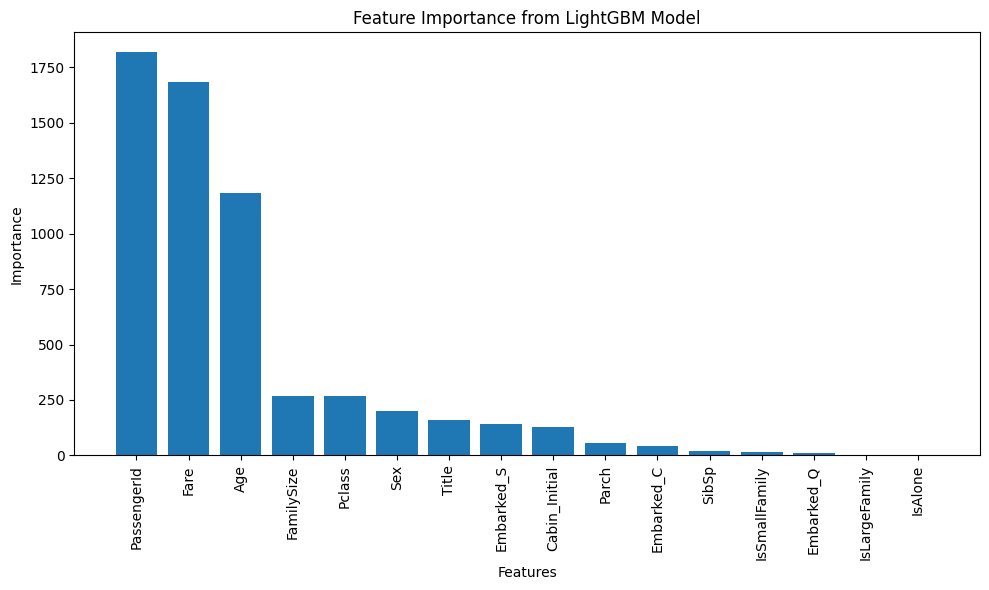

In [21]:
# prompt: それぞれのデータの精度への影響度をグラフで見せて

# モデルの最適なestimatorを取得
best_model = grid_search.best_estimator_

# 特徴量の重要度を取得
# feature_importances_は、モデルが学習済みである必要があります。
# ここではgrid_searchによって学習された最適なモデルを使用します。
feature_importances = best_model.feature_importances_

# 特徴量の名前を取得
feature_names = X.columns

# 特徴量名と重要度をペアにしてソート
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
importance_df = importance_df.sort_values('importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# 特徴量の重要度を棒グラフで表示
plt.figure(figsize=(10, 6))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance from LightGBM Model")
plt.tight_layout()
plt.show()

Ageの欠損値数 (train_df): 0
Ageの欠損値数 (test_df): 1

相関行列:
Age              1.000000
Title            0.520818
IsAlone          0.178146
Fare             0.122175
Sex              0.101651
Embarked_C       0.049072
PassengerId      0.042557
Embarked_S       0.023505
IsSmallFamily   -0.061120
Survived        -0.061466
Embarked_Q      -0.105664
Parch           -0.184719
IsLargeFamily   -0.229853
SibSp           -0.270377
FamilySize      -0.277076
Cabin_Initial   -0.289398
Pclass          -0.416467
Name: Age, dtype: float64


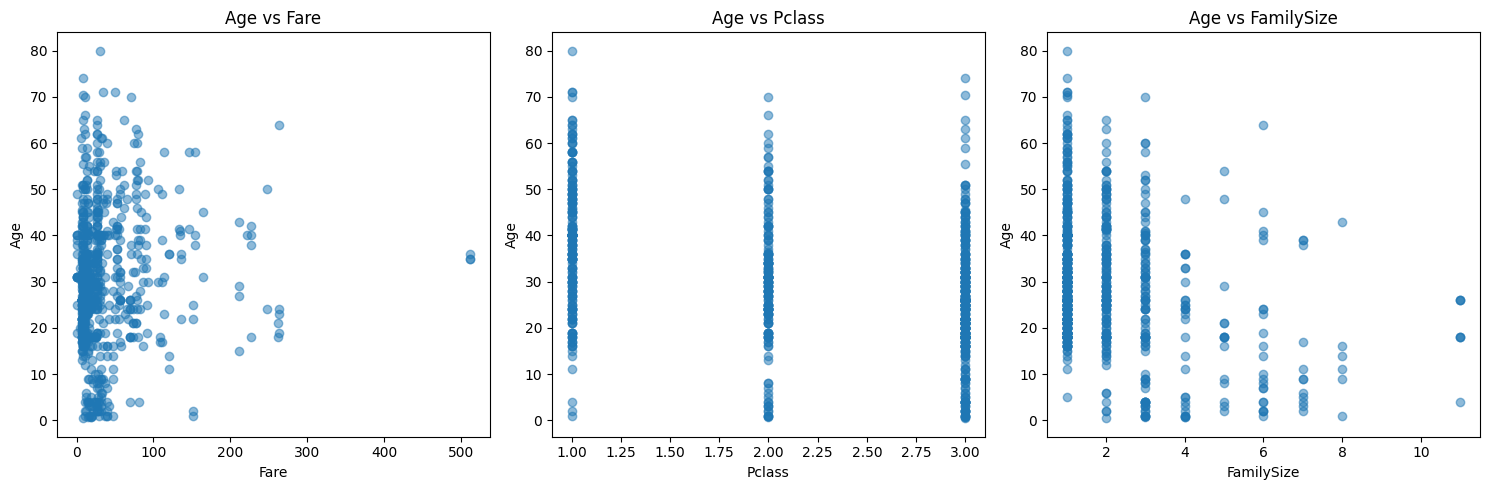


Age欠損値補完後の状態 (train_df):
Ageの欠損値数 (train_df): 0

Age欠損値補完後の状態 (test_df):
Ageの欠損値数 (test_df): 0

Train dataset after Age imputation and dropping object columns:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    1  22.0      1      0   7.2500   
1            2         1       1    0  38.0      1      0  71.2833   
2            3         1       3    0  26.0      0      0   7.9250   
3            4         1       1    0  35.0      1      0  53.1000   
4            5         0       3    1  35.0      0      0   8.0500   

   Cabin_Initial  Title  Embarked_C  Embarked_Q  Embarked_S  FamilySize  \
0              5      2       False       False        True           2   
1              2      3        True       False       False           2   
2              5      1       False       False        True           1   
3              2      3       False       False        True           2   
4              5      2       False       F

<ipython-input-22-3420175379>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(median_age_train, inplace=True)
<ipython-input-22-3420175379>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [22]:
# prompt: Ageと相関関係がある他のデータを調べ、そこからAgeの欠損値を補完したい
# 相関関係はグラフで見せて

# Ageの欠損値を確認
print("Ageの欠損値数 (train_df):", train_df['Age'].isnull().sum())
print("Ageの欠損値数 (test_df):", test_df['Age'].isnull().sum())

# Ageと他の数値型データの相関関係を確認
correlation_matrix = train_df.corr(numeric_only=True)
print("\n相関行列:")
print(correlation_matrix['Age'].sort_values(ascending=False))

# Ageとの相関が強い特徴量をいくつか選び、散布図を表示
features_to_plot = ['Fare', 'Pclass', 'FamilySize'] # 相関が高い/関連がありそうな特徴量を選択

plt.figure(figsize=(15, 5))

for i, col in enumerate(features_to_plot):
  plt.subplot(1, len(features_to_plot), i + 1)
  # Ageに欠損値がないデータのみを使用してプロット
  plt.scatter(train_df.dropna(subset=['Age'])[col], train_df.dropna(subset=['Age'])['Age'], alpha=0.5)
  plt.xlabel(col)
  plt.ylabel('Age')
  plt.title(f'Age vs {col}')

plt.tight_layout()
plt.show()

# Ageの欠損値を補完する方法を検討
# 例: 平均値、中央値、あるいは他の特徴量との関係性（回帰モデルなど）を利用
# ここではシンプルに中央値で補完する例を示します。
# より高度な方法として、Ageを目的変数とするモデルを作成し、欠損値を予測する方法もあります。

# Ageの中央値を計算 (trainデータのみから計算するのが一般的)
median_age_train = train_df['Age'].median()
median_age_test = test_df['Age'].median()

# Ageの欠損値を中央値で補完
train_df['Age'].fillna(median_age_train, inplace=True)
test_df['Age'].fillna(median_age_test, inplace=True) # testデータも補完

print("\nAge欠損値補完後の状態 (train_df):")
print("Ageの欠損値数 (train_df):", train_df['Age'].isnull().sum())
print("\nAge欠損値補完後の状態 (test_df):")
print("Ageの欠損値数 (test_df):", test_df['Age'].isnull().sum())

# 以降のモデル学習に使用するデータフレームを更新する必要がある
# ここでは、train_dfとtest_dfがAge補完後のものになっている
# train_df_cleanedとtest_df_cleanedを再度作成する
train_df_cleaned = drop_object_columns(train_df)
test_df_cleaned = drop_object_columns(test_df)

print("\nTrain dataset after Age imputation and dropping object columns:")
print(train_df_cleaned.head())

print("\nTest dataset after Age imputation and dropping object columns:")
print(test_df_cleaned.head())

# Xとyも更新
X = train_df_cleaned.drop('Survived', axis=1)
y = train_df_cleaned['Survived']

# グリッドサーチを再度実行する場合（Age補完後のデータで学習）
# grid_search.fit(X, y)
# print("\nBest parameters found by GridSearchCV (after Age imputation):")
# print(grid_search.best_params_)
# print(f"\nBest cross-validation accuracy (after Age imputation): {grid_search.best_score_}")

# # 最適なモデルでテストデータを予測 (Age補完後のデータで予測)
# best_lgb_clf = grid_search.best_estimator_
# test_predictions_final = best_lgb_clf.predict(test_df_cleaned)

# # 予測結果をDataFrameに変換
# submission_df = test_df[['PassengerId']].copy() # オリジナルのtest_dfからPassengerIdを取得
# submission_df['Survived'] = test_predictions_final.astype(int)

# print("\nTest set predictions after Age imputation:")
# print(submission_df.head())

# # 提出用ファイルの保存 (オプション)
# submission_df.to_csv('submission_age_imputed.csv', index=False)